# 인공 신경망 구조 이해하기

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F

cuda=torch.device('cuda')

# Write neural network code
class NeuralNetwork(nn.Module):

    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(1,4)
        self.fc2 = nn.Linear(4,16)
        self.fc3 = nn.Linear(16,4)
        self.fc4 = nn.Linear(4,1)
        
    def forward(self, x):
        x=self.fc1(x)
        x=F.relu(x)
        x=self.fc2(x)
        x=F.relu(x)
        x=self.fc3(x)
        x=F.relu(x)
        x=self.fc4(x)
        return x

# Define the network and the loss function.
network = NeuralNetwork()
loss_function = nn.MSELoss()

# Steps for gradient descent.
# 'lr' stands for learning rate.
optimizer = torch.optim.Adam(network.parameters(), lr=0.001)

# Training one step with sample data
x = torch.Tensor([1])
y = x**3 + x**2 - x - 1

optimizer.zero_grad()
output = network(x)
loss = loss_function(y,output)
loss.backward()
optimizer.step()

# Check parameters
parameters = network.fc1.state_dict()
w = parameters['weight']  # e.g. [-5, -1.2, 1.2, 1.2, 2, 5]
b = parameters['bias']  # e.g. [-7.7, -1.3, 1, -0.2, -1.1, -5]
print(w)
print(b)

tensor([[-0.2315],
        [ 0.0626],
        [ 0.6874],
        [-0.9563]])
tensor([ 0.2107, -0.9077, -0.9509, -0.5923])


In [31]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

# Define the network and the loss function.
network = NeuralNetwork()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(network.parameters(), lr=0.01)

pbar = tqdm(range(10000), desc="Loss: --")
for epoch in pbar:
    x=torch.Tensor([random.randint(-10,10)])
    y = x**3 + x**2 - x - 1
    optimizer.zero_grad()
    y_exp = network(x)
    loss = loss_function(y_exp,y)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        pbar.set_description(f"Loss: {loss.item():.3f}")

Loss: 0.263: 100%|██████████| 10000/10000 [00:13<00:00, 737.37it/s]


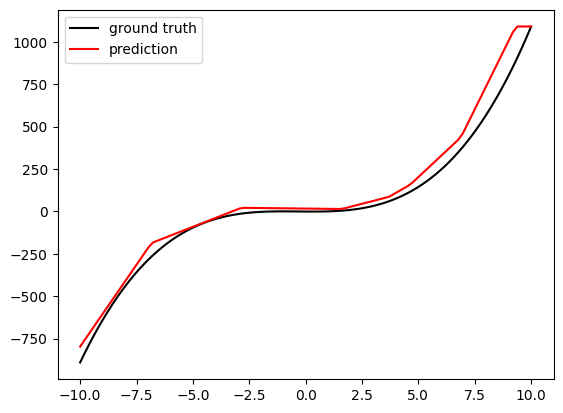

In [32]:
# plot the result
x_lim = 10
num_points = 100

x = torch.linspace(-x_lim, x_lim, num_points)
y = x**3 + x**2 - x - 1
plt.plot(x, y, label="ground truth", color="black")
plt.plot(x, network(x[:, None]).detach().numpy(), label="prediction", color="red")
plt.legend()
plt.show()

## MLP으아앙아아아아아아

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms, datasets

gpu = torch.device('cuda')

train_datasets = datasets.MNIST(root="./data/MNIST",
                                train=True,
                                download=True,
                                transform=transforms.ToTensor())

test_datasets = datasets.MNIST(root="./data/MNIST",
                                train=False,
                                transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_datasets,batch_size=32,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_datasets,batch_size=32,shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST\MNIST\raw\train-images-idx3-ubyte.gz to ./data/MNIST\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST\MNIST\raw\train-labels-idx1-ubyte.gz to ./data/MNIST\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data/MNIST\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting ./data/MNIST\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/MNIST\MNIST\raw



In [2]:
for (x,y) in train_loader:
    print(f"x:{x.size()}")
    print(f"y:{y.size()}")
    break

x:torch.Size([32, 1, 28, 28])
y:torch.Size([32])


In [3]:
train_loader.dataset.train_labels

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([5, 0, 4,  ..., 5, 6, 8])

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


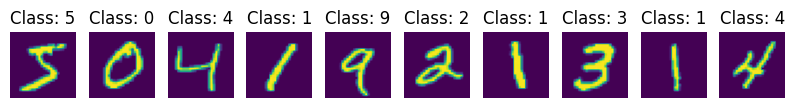

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,1))

for i in range(10):
    plt.subplot(1,10,i+1) # plot.subplot(rows, columns, index)
    plt.axis('off')
    plt.imshow(train_loader.dataset.train_data[i].numpy().reshape(28,28))
    plt.title('Class: '+str(train_loader.dataset.train_labels[i].item()))

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(28*28,1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512,512)
        self.fc4 = nn.Linear(512,10)
        self.relu = nn.ReLU()
    
    def forward(self,x):
        # ...
        x = x.view(-1,28*28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)

        return x

In [6]:
model = Net().to(gpu)

learning_rate=1e-3

optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=10, bias=True)
  (relu): ReLU()
)


In [8]:
epoch = 50

for i in range(epoch):

    # Model Train
    model.train()
    for batch_idx,(image,label) in enumerate(train_loader):
        image = image.to(gpu)
        label = label.to(gpu)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output,label)
        loss.backward()
        optimizer.step()
        if batch_idx % 1000 == 0:
            print(f"Train epoch:{i} Train_loss:{loss.item():.3f}")
        
    # Model Evaluate
    model.eval()
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for image_t,label_t in test_loader:
            image_t = image_t.to(gpu)
            label_t = label_t.to(gpu)
            output_t = model(image_t)
            test_loss += criterion(output_t,label_t).item()
            prediction = output_t.max(1,keepdim=True)[1]
            correct += prediction.eq(label_t.view_as(prediction)).sum().item()
    
    test_loss /= (len(test_loader.dataset)/32)
    test_accuracy = 100*correct/len(test_loader.dataset)

    print(f"test_loss : {test_loss}, test_accuracy : {test_accuracy}")
    

Train epoch:0 Train_loss:0.465
Train epoch:0 Train_loss:0.314
test_loss : 0.2387220479875803, test_accuracy : 93.05
Train epoch:1 Train_loss:0.142
Train epoch:1 Train_loss:0.600
test_loss : 0.2335909531146288, test_accuracy : 93.27
Train epoch:2 Train_loss:0.240
Train epoch:2 Train_loss:0.085
test_loss : 0.2292182482212782, test_accuracy : 93.41
Train epoch:3 Train_loss:0.176
Train epoch:3 Train_loss:0.201
test_loss : 0.22513171138465404, test_accuracy : 93.68
Train epoch:4 Train_loss:0.160
Train epoch:4 Train_loss:0.152
test_loss : 0.21953152815550567, test_accuracy : 93.84
Train epoch:5 Train_loss:0.151
Train epoch:5 Train_loss:0.271
test_loss : 0.21385203872174025, test_accuracy : 93.86
Train epoch:6 Train_loss:0.215
Train epoch:6 Train_loss:0.306
test_loss : 0.21132381649017334, test_accuracy : 93.93
Train epoch:7 Train_loss:0.489
Train epoch:7 Train_loss:0.154
test_loss : 0.20712995827496053, test_accuracy : 94.13
Train epoch:8 Train_loss:0.135
Train epoch:8 Train_loss:0.220
test_